# An example using `solve_ivp` to solve an Initial Value Problem


[AMath 586, Spring Quarter 2019](http://staff.washington.edu/rjl/classes/am586s2019/) at the University of Washington. Developed by R.J. LeVeque and distributed under the [BSD license](https://github.com/rjleveque/amath586s2019/blob/master/LICENSE).  You are free to modify and use as you please, with attribution.

This notebook illustrates use of the [Scipy](https://scipy.org/) routine `solve_ivp` for solving the initial value problem.

The following notebook "magic" command makes plots show up in the notebook in a manner that you can interact with them, e.g. zooming in.   If you give plot commands in more than one cell you should close earlier figures before plotting new ones, or start each such cell with a `figure` command.

(Instead use `%matplotlib inline` to get them to show up in notebook but not be interactive.)

In [1]:
%matplotlib notebook

Importing everything from `pylab` puts all the [Numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/) commands in the namespace, so we can use them directly:

In [2]:
from pylab import *

Import `solve_ivp` from [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html).  

In [3]:
from scipy.integrate import solve_ivp

If this import statement fails on your computer it might be that you don't have a new enough version of Scipy, since `solve_ivp` is a relatively recent addition.  To see what version you have, try:

In [4]:
import scipy
scipy.__version__

'1.2.1'

## Test problem

consider the linear ODE $u'(t) = Au(t)$ where 
$$A = \left[\begin{array}{rr}-2&0\\3&-1\end{array}\right].$$
with initial data $u(0) = [1, ~-1]^T$.

The exact solution is $u_1(t) = e^{-2t}, ~ u_2(t) = 2e^{-t} - 3e^{-2t}$.

In [5]:
utrue = lambda t: array([exp(-2*t),  2*exp(-t)-3*exp(-2*t)])

t0 = 0.
tf = 1.

# evaluate on fine grid to compare with computed solution:
tfine = linspace(t0, tf, 1000)
ufine = utrue(tfine)
print('ufine has shape ', ufine.shape)

ufine has shape  (2, 1000)


### Learn about `solve_ivp`

You can read the documentation for [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), or in a notebook (or interactive IPython shell) you can always learn about a function by typing its name followed by `?` and then executing the cell.  This prints out the "docstring".  

In [6]:
solve_ivp?

### Set up inputs needed

`solve_ivp` solves $f'(u) = f(t,u)$ and we need to define the function `f` along with initial data `u0` and the time over which we want output.  The latter is specified as an array `t_span = (t0, tf)` where `t0` is the time at which the initial data `u0` is given and `tf` is the final time.  We also specify a set of times `t_eval` where the routine should compute and save the solution as it goes along.  The grid it uses may be much finer and timesteps are chosen adaptively.

In [7]:
def f(t,u):
    f0 = -2*u[0]
    f1 = 3*u[0] - u[1]
    return array([f0,f1])

u0 = array([1., -1.])

t_span = (t0, tf)
t_eval = linspace(0, 1., 21)

In [8]:
solution = solve_ivp(f, t_span, u0, method='RK45', t_eval=t_eval, dense_output=True)

In [9]:
print(solution.t)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


Note that `solve_ode` returns the solution in `solution.y`, but we are calling it `u`...

In [10]:
u = solution.y
u.shape

(2, 21)

<IPython.core.display.Javascript object>


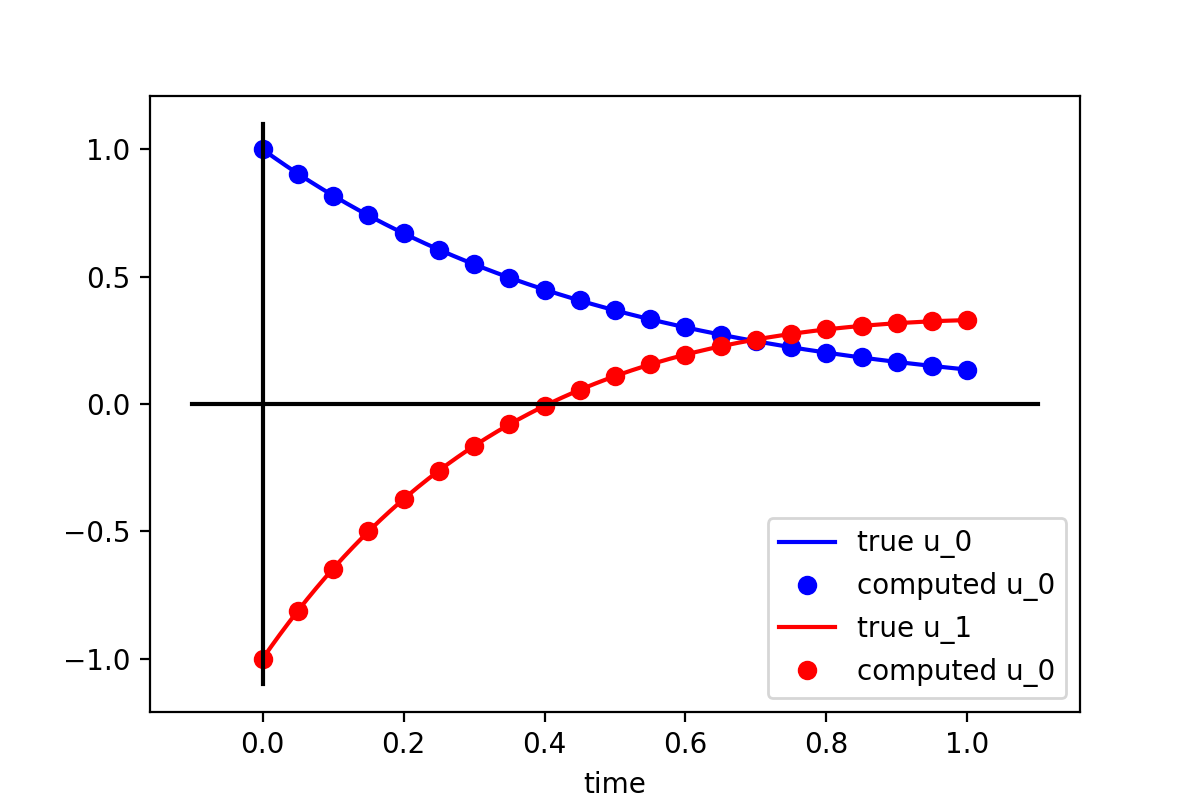

In [11]:
figure(figsize=(6,4))
plot(tfine, ufine[0,:], 'b-', label='true u_0')
plot(solution.t, u[0,:], 'bo', label='computed u_0')
plot(tfine, ufine[1,:], 'r-', label='true u_1')
plot(solution.t, u[1,:], 'ro', label='computed u_0')
legend(loc='lower right')
# plot axes:
plot([-0.1,1.1], [0,0], 'k')
plot([0,0],[-1.1,1.1], 'k')
xlabel('time')

### Error at the final time:

Note that in Python index `-1` refers to the last element in an array (and `-2` is penultimate, etc.).

We also print out how many times `f` was evaluated to compute this solution, a measure of the work required:

In [12]:
print('Errors are: ')
print(u[:,-1] - ufine[:,-1])
print('Using %i function evaluations' % solution.nfev)

Errors are: 
[ 6.32800711e-05 -1.86811351e-04]
Using 26 function evaluations


### Compute a more accurate solution:

Optional arguments `rtol` and `atol` can be passed to force more accuracy:

In [13]:
solution = solve_ivp(f, t_span, u0, method='RK45', t_eval=t_eval, dense_output=True, rtol=1e-9)

In [14]:
u = solution.y
print('Errors are: ')
print(u[:,-1] - ufine[:,-1])
print('Using %i function evaluations' % solution.nfev)

Errors are: 
[ 6.45026199e-08 -1.88968671e-07]
Using 62 function evaluations
